🚀 INICIANDO AUDITORIA DO ONLINE RETAIL DATASET
✅ Dataset carregado: (541909, 8)
🔍 INICIANDO AUDITORIA DE DADOS...


C:\Users\DevBook\AppData\Local\Temp\ipykernel_7260\3607596676.py:47: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'empty_strings': (self.df.applymap(lambda x: x == '').sum()).to_dict(),
C:\Users\DevBook\AppData\Local\Temp\ipykernel_7260\3607596676.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'whitespace_only': (self.df.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()).to_dict()



📊 RELATÓRIO DE AUDITORIA DE DADOS

📋 INFORMAÇÕES BÁSICAS:
   • Dimensões: (541909, 8)
   • Uso de memória: 126.18 MB

✅ COMPLETUDE:
   • Description: 0.3% nulos (1454 registros)
   • CustomerID: 24.9% nulos (135080 registros)

🔍 UNICIDADE:
   • Duplicatas totais: 5268 (1.0%)

🎯 SCORE DE QUALIDADE: 90.8/100
✅ QUALIDADE EXCELENTE
   📊 Visualizações salvas em: audit_reports\images/

💾 RELATÓRIOS SALVOS EM: audit_reports/
   📄 audit_report_20251112_092948.txt
   📄 audit_report_20251112_092948.json
   📄 audit_report_20251112_092948.xlsx
   📄 audit_report_20251112_092948.html

✅ Auditoria concluída com sucesso!
💾 4 arquivos de relatório salvos


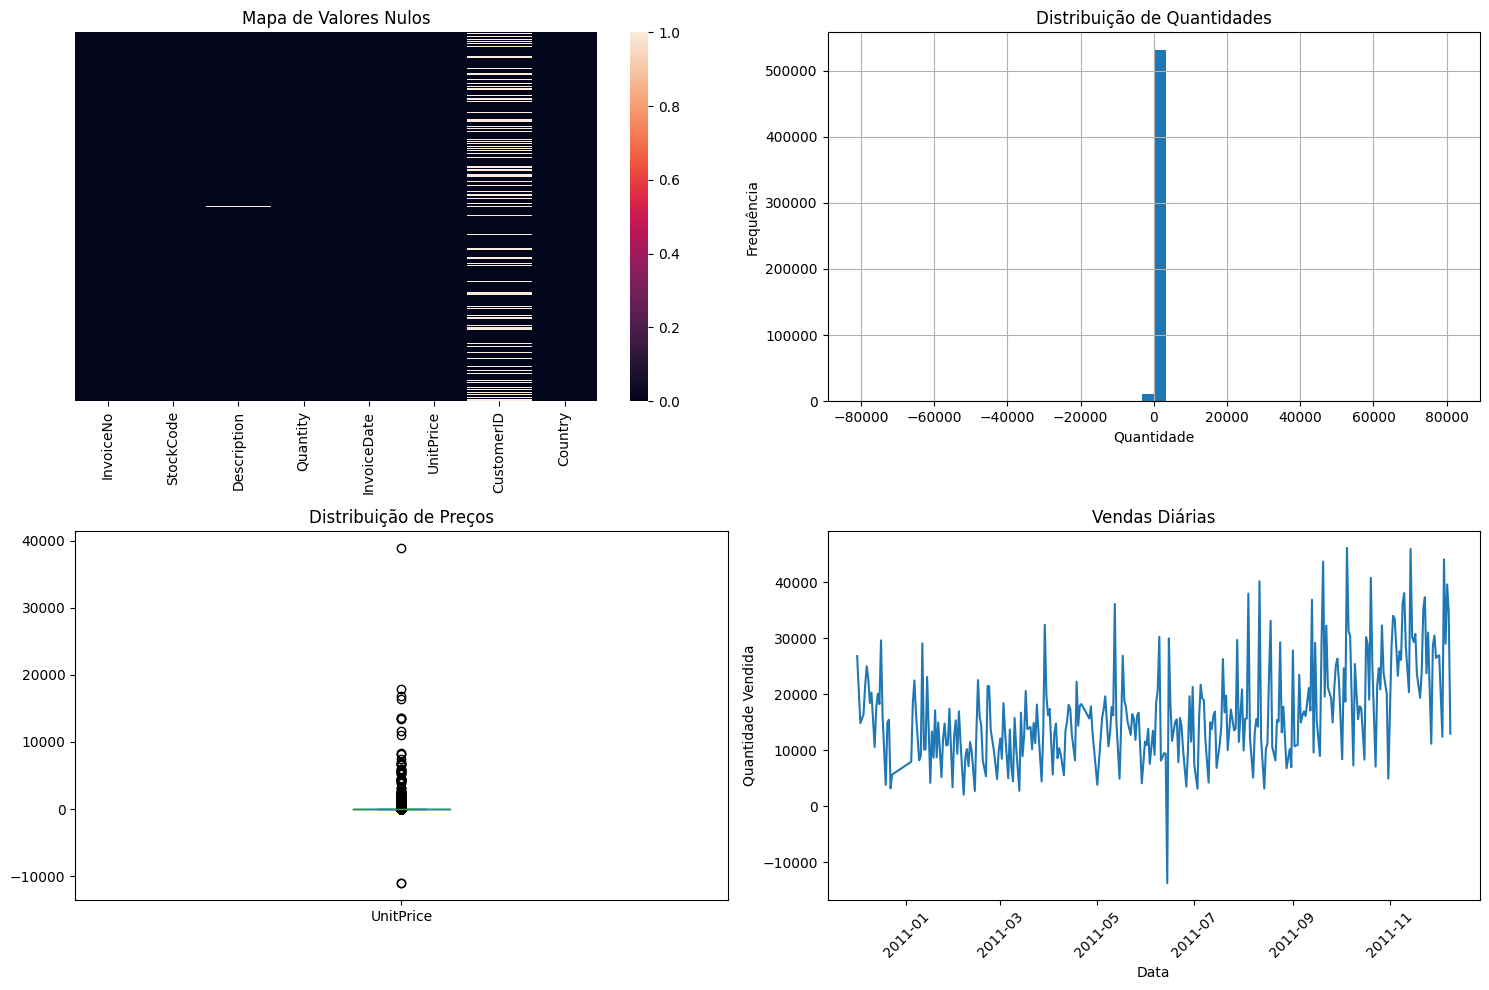

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
import os

class DataAuditor:
    def __init__(self, df):
        self.df = df.copy()
        self.audit_report = {}
        self.timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    def comprehensive_audit(self):
        """Executa auditoria completa"""
        print("🔍 INICIANDO AUDITORIA DE DADOS...")
        
        self.audit_report['basic_info'] = self.basic_info()
        self.audit_report['completeness'] = self.check_completeness()
        self.audit_report['data_types'] = self.check_data_types()
        self.audit_report['uniqueness'] = self.check_uniqueness()
        self.audit_report['outliers'] = self.detect_outliers()
        self.audit_report['business_rules'] = self.check_business_rules()
        self.audit_report['timeline'] = self.check_timeline_consistency()
        self.audit_report['consistency'] = self.check_consistency()
        
        self.generate_report()
        return self.audit_report

    def basic_info(self):
        """Informações básicas do dataset"""
        info = {
            'shape': self.df.shape,
            'memory_usage': self.df.memory_usage(deep=True).sum(),
            'columns': list(self.df.columns),
            'data_types': self.df.dtypes.to_dict()
        }
        return info

    def check_completeness(self):
        """Verifica completude dos dados"""
        completeness = {
            'total_rows': len(self.df),
            'null_count': self.df.isnull().sum().to_dict(),
            'null_percentage': (self.df.isnull().sum() / len(self.df) * 100).to_dict(),
            'empty_strings': (self.df.applymap(lambda x: x == '').sum()).to_dict(),
            'whitespace_only': (self.df.applymap(lambda x: isinstance(x, str) and x.strip() == '').sum()).to_dict()
        }
        return completeness

    def check_data_types(self):
        """Analisa consistência de tipos de dados"""
        type_analysis = {}
        
        for col in self.df.columns:
            type_analysis[col] = {
                'dtype': str(self.df[col].dtype),
                'unique_count': self.df[col].nunique(),
                'sample_values': self.df[col].dropna().head(3).tolist() if self.df[col].nunique() > 0 else [],
                'mixed_types': self._check_mixed_types(col)
            }
        
        return type_analysis

    def _check_mixed_types(self, column):
        """Verifica se há tipos mistos em uma coluna"""
        try:
            types = self.df[column].apply(type).value_counts()
            return len(types) > 1
        except:
            return False

    def check_uniqueness(self):
        """Analisa unicidade e duplicatas"""
        uniqueness = {
            'total_duplicates': self.df.duplicated().sum(),
            'percentage_duplicates': (self.df.duplicated().sum() / len(self.df)) * 100,
            'key_candidates': self._find_key_candidates(),
            'column_uniqueness': {}
        }
        
        for col in self.df.columns:
            uniqueness['column_uniqueness'][col] = {
                'unique_count': self.df[col].nunique(),
                'unique_percentage': (self.df[col].nunique() / len(self.df)) * 100
            }
        
        return uniqueness

    def _find_key_candidates(self):
        """Identifica possíveis chaves primárias"""
        candidates = []
        for col in self.df.columns:
            if self.df[col].nunique() == len(self.df) and self.df[col].notna().all():
                candidates.append(col)
        return candidates

    def detect_outliers(self):
        """Detecta outliers em colunas numéricas"""
        numeric_cols = self.df.select_dtypes(include=[np.number]).columns
        outliers = {}
        
        for col in numeric_cols:
            try:
                Q1 = self.df[col].quantile(0.25)
                Q3 = self.df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outlier_mask = (self.df[col] < lower_bound) | (self.df[col] > upper_bound)
                outlier_count = outlier_mask.sum()
                
                outliers[col] = {
                    'outlier_count': outlier_count,
                    'outlier_percentage': (outlier_count / len(self.df)) * 100,
                    'min': self.df[col].min(),
                    'max': self.df[col].max(),
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound
                }
            except:
                outliers[col] = {'error': 'Não foi possível calcular outliers'}
        
        return outliers

    def check_business_rules(self):
        """Verifica regras de negócio específicas"""
        violations = {}
        
        # Exemplo para dataset de retail
        if 'Quantity' in self.df.columns:
            negative_qty = (self.df['Quantity'] < 0).sum()
            violations['negative_quantity'] = {
                'count': negative_qty,
                'percentage': (negative_qty / len(self.df)) * 100
            }
        
        if 'UnitPrice' in self.df.columns:
            zero_price = (self.df['UnitPrice'] == 0).sum()
            negative_price = (self.df['UnitPrice'] < 0).sum()
            violations['pricing_issues'] = {
                'zero_prices': zero_price,
                'negative_prices': negative_price
            }
        
        if 'InvoiceDate' in self.df.columns:
            try:
                df_date = self.df.copy()
                df_date['InvoiceDate'] = pd.to_datetime(df_date['InvoiceDate'])
                future_dates = (df_date['InvoiceDate'] > datetime.now()).sum()
                violations['future_dates'] = future_dates
            except:
                violations['date_parsing_error'] = 'Erro ao processar datas'
        
        return violations

    def check_timeline_consistency(self):
        """Verifica consistência em séries temporais"""
        timeline_issues = {}
        
        if 'InvoiceDate' in self.df.columns:
            try:
                date_col = pd.to_datetime(self.df['InvoiceDate'])
                
                timeline_issues = {
                    'date_range': {
                        'min': date_col.min(),
                        'max': date_col.max(),
                        'span_days': (date_col.max() - date_col.min()).days
                    },
                    'missing_dates': self._find_missing_dates(date_col),
                    'duplicate_timestamps': self._find_duplicate_timestamps(date_col)
                }
            except Exception as e:
                timeline_issues = {'error': f'Erro ao analisar datas: {str(e)}'}
        
        return timeline_issues

    def _find_missing_dates(self, date_series):
        """Encontra datas faltantes em séries temporais"""
        try:
            full_range = pd.date_range(start=date_series.min(), end=date_series.max())
            missing = full_range.difference(date_series)
            return len(missing)
        except:
            return 0

    def _find_duplicate_timestamps(self, date_series):
        """Encontra timestamps duplicados"""
        return date_series.duplicated().sum()

    def check_consistency(self):
        """Verifica consistência geral dos dados"""
        consistency_issues = {}
        
        # Verificar consistência entre colunas relacionadas
        if all(col in self.df.columns for col in ['Quantity', 'UnitPrice']):
            # Verificar se há Quantity > 0 mas UnitPrice = 0
            free_items = ((self.df['Quantity'] > 0) & (self.df['UnitPrice'] == 0)).sum()
            if free_items > 0:
                consistency_issues['free_items'] = {
                    'count': free_items,
                    'description': 'Itens com quantidade positiva mas preço zero'
                }
        
        return consistency_issues

    def generate_report(self):
        """Gera relatório completo da auditoria"""
        print("\n" + "="*50)
        print("📊 RELATÓRIO DE AUDITORIA DE DADOS")
        print("="*50)
        
        # Informações básicas
        basic = self.audit_report['basic_info']
        print(f"\n📋 INFORMAÇÕES BÁSICAS:")
        print(f"   • Dimensões: {basic['shape']}")
        print(f"   • Uso de memória: {basic['memory_usage'] / 1024**2:.2f} MB")
        
        # Completude
        comp = self.audit_report['completeness']
        print(f"\n✅ COMPLETUDE:")
        for col, null_pct in comp['null_percentage'].items():
            if null_pct > 0:
                print(f"   • {col}: {null_pct:.1f}% nulos ({comp['null_count'][col]} registros)")
        
        # Duplicatas
        uni = self.audit_report['uniqueness']
        print(f"\n🔍 UNICIDADE:")
        print(f"   • Duplicatas totais: {uni['total_duplicates']} ({uni['percentage_duplicates']:.1f}%)")
        
        # Score de qualidade
        quality_score = self._calculate_quality_score()
        print(f"\n🎯 SCORE DE QUALIDADE: {quality_score:.1f}/100")
        if quality_score >= 90:
            print("✅ QUALIDADE EXCELENTE")
        elif quality_score >= 70:
            print("⚠️  QUALIDADE ACEITÁVEL")
        else:
            print("🚨 QUALIDADE CRÍTICA - NECESSÁRIO AJUSTES")

    def save_audit_report(self, output_dir="audit_reports", formats=None):
        """
        Salva o relatório de auditoria em múltiplos formatos
        """
        if formats is None:
            formats = ['txt', 'json', 'excel', 'html']
        
        # Criar diretório se não existir
        os.makedirs(output_dir, exist_ok=True)
        
        base_filename = f"audit_report_{self.timestamp}"
        
        saved_files = []
        
        if 'txt' in formats:
            saved_files.append(self._save_txt_report(output_dir, base_filename))
        
        if 'json' in formats:
            saved_files.append(self._save_json_report(output_dir, base_filename))
        
        if 'excel' in formats:
            saved_files.append(self._save_excel_report(output_dir, base_filename))
        
        if 'html' in formats:
            saved_files.append(self._save_html_report(output_dir, base_filename))
        
        # Salvar visualizações
        self._save_visualizations(output_dir, base_filename)
        
        print(f"\n💾 RELATÓRIOS SALVOS EM: {output_dir}/")
        for file in saved_files:
            if file:
                print(f"   📄 {os.path.basename(file)}")
        
        return saved_files

    def _save_txt_report(self, output_dir, base_filename):
        """Salva relatório em formato texto"""
        filename = os.path.join(output_dir, f"{base_filename}.txt")
        
        with open(filename, 'w', encoding='utf-8') as f:
            f.write("="*60 + "\n")
            f.write("           RELATÓRIO DE AUDITORIA DE DADOS\n")
            f.write("="*60 + "\n")
            f.write(f"Data da auditoria: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}\n")
            f.write(f"Dataset: {self.audit_report['basic_info']['shape']}\n\n")
            
            # Informações básicas
            f.write("📋 INFORMAÇÕES BÁSICAS:\n")
            f.write(f"   • Dimensões: {self.audit_report['basic_info']['shape']}\n")
            f.write(f"   • Uso de memória: {self.audit_report['basic_info']['memory_usage'] / 1024**2:.2f} MB\n")
            
            # Completude
            f.write("\n✅ COMPLETUDE:\n")
            comp = self.audit_report['completeness']
            for col, null_pct in comp['null_percentage'].items():
                if null_pct > 0:
                    f.write(f"   • {col}: {null_pct:.1f}% nulos ({comp['null_count'][col]} registros)\n")
            
            # Duplicatas
            f.write("\n🔍 UNICIDADE:\n")
            uni = self.audit_report['uniqueness']
            f.write(f"   • Duplicatas totais: {uni['total_duplicates']} ({uni['percentage_duplicates']:.1f}%)\n")
            
            # Score de qualidade
            quality_score = self._calculate_quality_score()
            f.write(f"\n🎯 SCORE DE QUALIDADE: {quality_score:.1f}/100\n")
            if quality_score >= 90:
                f.write("✅ QUALIDADE EXCELENTE\n")
            elif quality_score >= 70:
                f.write("⚠️  QUALIDADE ACEITÁVEL\n")
            else:
                f.write("🚨 QUALIDADE CRÍTICA - NECESSÁRIO AJUSTES\n")
        
        return filename

    def _save_json_report(self, output_dir, base_filename):
        """Salva relatório em formato JSON"""
        filename = os.path.join(output_dir, f"{base_filename}.json")
        
        # Adicionar score de qualidade ao relatório
        report_with_score = self.audit_report.copy()
        report_with_score['quality_score'] = self._calculate_quality_score()
        report_with_score['audit_timestamp'] = self.timestamp
        report_with_score['dataset_shape'] = self.audit_report['basic_info']['shape']
        
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(report_with_score, f, indent=2, ensure_ascii=False, default=str)
        
        return filename

    def _save_excel_report(self, output_dir, base_filename):
        """Salva relatório em formato Excel com múltiplas abas"""
        filename = os.path.join(output_dir, f"{base_filename}.xlsx")
        
        try:
            with pd.ExcelWriter(filename, engine='openpyxl') as writer:
                # Resumo executivo
                summary_data = {
                    'Métrica': [
                        'Data da Auditoria',
                        'Total de Registros', 
                        'Total de Colunas',
                        'Valores Nulos',
                        'Registros Duplicados',
                        'Score de Qualidade',
                        'Status'
                    ],
                    'Valor': [
                        datetime.now().strftime('%d/%m/%Y %H:%M:%S'),
                        self.audit_report['basic_info']['shape'][0],
                        self.audit_report['basic_info']['shape'][1],
                        f"{sum(self.audit_report['completeness']['null_count'].values())}",
                        f"{self.audit_report['uniqueness']['total_duplicates']}",
                        f"{self._calculate_quality_score():.1f}/100",
                        "EXCELENTE" if self._calculate_quality_score() >= 90 else 
                        "ACEITÁVEL" if self._calculate_quality_score() >= 70 else "CRÍTICO"
                    ]
                }
                pd.DataFrame(summary_data).to_excel(writer, sheet_name='Resumo', index=False)
                
                # Completude
                completeness_df = pd.DataFrame({
                    'Coluna': list(self.audit_report['completeness']['null_count'].keys()),
                    'Valores_Nulos': list(self.audit_report['completeness']['null_count'].values()),
                    'Percentual_Nulos': list(self.audit_report['completeness']['null_percentage'].values())
                })
                completeness_df.to_excel(writer, sheet_name='Completude', index=False)
                
            return filename
        except Exception as e:
            print(f"❌ Erro ao salvar Excel: {e}")
            return None

    def _save_html_report(self, output_dir, base_filename):
        """Salva relatório em formato HTML"""
        filename = os.path.join(output_dir, f"{base_filename}.html")
        
        quality_score = self._calculate_quality_score()
        
        html_content = f"""
        <!DOCTYPE html>
        <html lang="pt-BR">
        <head>
            <meta charset="UTF-8">
            <title>Relatório de Auditoria de Dados</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 40px; }}
                .header {{ background-color: #f8f9fa; padding: 20px; border-radius: 10px; }}
                .section {{ margin: 20px 0; padding: 15px; border-left: 4px solid #007bff; }}
                .good {{ color: green; }}
                .warning {{ color: orange; }}
                .critical {{ color: red; }}
                table {{ border-collapse: collapse; width: 100%; }}
                th, td {{ border: 1px solid #ddd; padding: 8px; text-align: left; }}
                th {{ background-color: #f2f2f2; }}
            </style>
        </head>
        <body>
            <div class="header">
                <h1>📊 Relatório de Auditoria de Dados</h1>
                <p><strong>Data:</strong> {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}</p>
                <p><strong>Dataset:</strong> {self.audit_report['basic_info']['shape']}</p>
                <h2>Score de Qualidade: <span class="{'good' if quality_score >= 90 else 'warning' if quality_score >= 70 else 'critical'}">{quality_score:.1f}/100</span></h2>
            </div>
            
            <div class="section">
                <h2>📋 Informações Básicas</h2>
                <p><strong>Dimensões:</strong> {self.audit_report['basic_info']['shape']}</p>
                <p><strong>Uso de memória:</strong> {self.audit_report['basic_info']['memory_usage'] / 1024**2:.2f} MB</p>
            </div>
            
            <div class="section">
                <h2>✅ Completude</h2>
                <table>
                    <tr><th>Coluna</th><th>Valores Nulos</th><th>Percentual</th></tr>
        """
        
        # Tabela de completude
        for col, null_pct in self.audit_report['completeness']['null_percentage'].items():
            if null_pct > 0:
                html_content += f"""
                    <tr>
                        <td>{col}</td>
                        <td>{self.audit_report['completeness']['null_count'][col]}</td>
                        <td>{null_pct:.1f}%</td>
                    </tr>
                """
        
        html_content += f"""
                </table>
            </div>
            
            <div class="section">
                <h2>🔍 Unicidade</h2>
                <p><strong>Registros duplicados:</strong> {self.audit_report['uniqueness']['total_duplicates']} ({self.audit_report['uniqueness']['percentage_duplicates']:.1f}%)</p>
            </div>
        </body>
        </html>
        """
        
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_content)
        
        return filename

    def _save_visualizations(self, output_dir, base_filename):
        """Salva visualizações da auditoria"""
        try:
            # Criar diretório para imagens
            img_dir = os.path.join(output_dir, "images")
            os.makedirs(img_dir, exist_ok=True)
            
            # Heatmap de valores nulos
            plt.figure(figsize=(10, 6))
            sns.heatmap(self.df.isnull(), cbar=True, yticklabels=False)
            plt.title('Mapa de Valores Nulos')
            plt.tight_layout()
            plt.savefig(os.path.join(img_dir, f"{base_filename}_null_heatmap.png"), dpi=300, bbox_inches='tight')
            plt.close()
            
            print(f"   📊 Visualizações salvas em: {img_dir}/")
                
        except Exception as e:
            print(f"⚠️  Erro ao salvar visualizações: {e}")

    def _calculate_quality_score(self):
        """Calcula score de qualidade dos dados"""
        try:
            scores = []
            
            # Completude (peso 30%)
            null_percentages = list(self.audit_report['completeness']['null_percentage'].values())
            completeness_score = 100 - np.mean(null_percentages)
            scores.append(completeness_score * 0.3)
            
            # Unicidade (peso 20%)
            dup_percentage = self.audit_report['uniqueness']['percentage_duplicates']
            uniqueness_score = 100 - dup_percentage
            scores.append(uniqueness_score * 0.2)
            
            # Consistência (peso 30%)
            violation_count = 0
            for v in self.audit_report['business_rules'].values():
                if isinstance(v, dict) and 'count' in v:
                    violation_count += v['count']
                elif isinstance(v, (int, float)):
                    violation_count += v
            
            consistency_score = max(0, 100 - (violation_count / self.audit_report['basic_info']['shape'][0] * 100))
            scores.append(consistency_score * 0.3)
            
            # Validação de tipos (peso 20%)
            mixed_types = sum([1 for v in self.audit_report['data_types'].values() if v.get('mixed_types', False)])
            type_score = 100 - (mixed_types / len(self.audit_report['data_types']) * 100)
            scores.append(type_score * 0.2)
            
            return sum(scores)
        except:
            return 0

# FUNÇÃO PRINCIPAL CORRIGIDA
def audit_online_retail_with_save():
    """Função principal para auditoria com salvamento automático"""
    # Carregar dados
    try:
        df = pd.read_excel("Online Retail.xlsx")
        print(f"✅ Dataset carregado: {df.shape}")
    except FileNotFoundError:
        print("❌ Arquivo 'Online Retail.xlsx' não encontrado!")
        return None, None
    except Exception as e:
        print(f"❌ Erro ao carregar arquivo: {e}")
        return None, None
    
    # Executar auditoria
    auditor = DataAuditor(df)
    report = auditor.comprehensive_audit()
    
    # Salvar relatórios em múltiplos formatos
    saved_files = auditor.save_audit_report(
        output_dir="audit_reports",
        formats=['txt', 'json', 'excel', 'html']
    )
    
    return report, saved_files

# FUNÇÃO PARA CRIAR VISUALIZAÇÕES
def create_audit_visualizations(df):
    """Cria visualizações para auditoria de dados"""
    try:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # 1. Heatmap de valores nulos
        sns.heatmap(df.isnull(), cbar=True, yticklabels=False, ax=axes[0,0])
        axes[0,0].set_title('Mapa de Valores Nulos')
        
        # 2. Distribuição de quantidades
        if 'Quantity' in df.columns:
            df['Quantity'].hist(bins=50, ax=axes[0,1])
            axes[0,1].set_title('Distribuição de Quantidades')
            axes[0,1].set_xlabel('Quantidade')
            axes[0,1].set_ylabel('Frequência')
        
        # 3. Boxplot de preços
        if 'UnitPrice' in df.columns:
            df['UnitPrice'].plot(kind='box', ax=axes[1,0])
            axes[1,0].set_title('Distribuição de Preços')
        
        # 4. Timeline de vendas
        if 'InvoiceDate' in df.columns and 'Quantity' in df.columns:
            try:
                df_temp = df.copy()
                df_temp['InvoiceDate'] = pd.to_datetime(df_temp['InvoiceDate'])
                daily_sales = df_temp.groupby(df_temp['InvoiceDate'].dt.date)['Quantity'].sum()
                
                axes[1,1].plot(daily_sales.index, daily_sales.values)
                axes[1,1].set_title('Vendas Diárias')
                axes[1,1].set_xlabel('Data')
                axes[1,1].set_ylabel('Quantidade Vendida')
                axes[1,1].tick_params(axis='x', rotation=45)
            except Exception as e:
                axes[1,1].text(0.5, 0.5, 'Erro na visualização', 
                              ha='center', va='center', transform=axes[1,1].transAxes)
        else:
            axes[1,1].text(0.5, 0.5, 'Dados insuficientes', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"⚠️  Erro ao criar visualizações: {e}")

# EXECUTAR AUDITORIA
if __name__ == "__main__":
    print("🚀 INICIANDO AUDITORIA DO ONLINE RETAIL DATASET")
    report, saved_files = audit_online_retail_with_save()
    
    if report:
        print(f"\n✅ Auditoria concluída com sucesso!")
        print(f"💾 {len([f for f in saved_files if f])} arquivos de relatório salvos")
        
        # Criar visualizações separadamente
        try:
            df = pd.read_excel("Online Retail.xlsx")
            create_audit_visualizations(df)
        except:
            print("⚠️  Não foi possível criar visualizações")
    else:
        print("\n❌ Falha na auditoria.")